In [1]:
library(tidyverse)
library(reshape2)
library(corrplot)
library(caret)
library(broom)
library(gvlma)
library(MASS)
library(car)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------ tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts --------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filt

In [2]:
#encoded data
zeolite_df <- read.table("ZeoX_Final_encoded.tsv", sep ="\t", header = T)

#reference dataset for numerical columns
zeolite_ref <- read.table("zeolites database catagories V 2.txt", sep ="\t", header = T)

In [3]:
rep_name <- function(prefix, len, start=1){paste0(prefix, rep(start: len))}

In [4]:
metal_prop <- lapply(c("C","Ri","m", "x"),rep_name, len = 3) %>% 
              unlist()

In [5]:
metal_cols_df  <-  zeolite_ref %>%
                dplyr::select(!!metal_prop) %>%
                dplyr::select(where(is.factor)) %>%
                distinct_all() %>% 
                unlist() %>%
                data.frame() %>%
                dplyr::filter(. != "") %>%
                distinct() 

In [6]:
metal_cols_df

,.
m11,Na+
m15,Ni+2
m18,Ag+
m22,Ce+4
m27,Cu+
m29,Ni2+
m210,Cs+2
m211,Cs+3
m212,Cs+4
m213,Cs+5


In [7]:
metal_ion <-  gsub("[+]", '.', metal_cols_df$.) 
metal_and_Capacity  <- c(metal_ion, metal_prop, c('Ce4..1','Capacity'))
`%nin%` <- Negate(`%in%`)
colnames(zeolite_df)[colnames(zeolite_df)  %nin% metal_and_Capacity]
metal_select <- zeolite_df[colnames(zeolite_df)  %in% metal_and_Capacity]

[1] "SA"                  "Vmicro"              "Vmeso"              
 [4] "pore_size"           "Si_Al"               "dipole_moment"      
 [7] "chemical_hardness"   "kinetic_diameter"    "C_0"                
[10] "oil_adsorbent_ratio" "Temp"                "AgX"                
[13] "AgY"                 "CeY"                 "CsY"                
[16] "CuAgY"               "CuCeY"               "CuHY"               
[19] "CuX"                 "CuY"                 "MCM.22"             
[22] "NaY"                 "NiCeY"               "NiY"                
[25] "clinoptilolite"      "Ni.2.1"              "DBT"                
[28] "TP"                  "cyclohexane"         "ether"              
[31] "hexadecane"          "iso.octane"          "n.Heptane"          
[34] "n.Octane"            "n.heptane"           "n.octane"

In [8]:
metal_select

C1,C2,C3,x1,x2,x3,Ri1,Ri2,Ri3,Capacity,...,Ni.2,Ce.,Ce.4,Cs.2,Cs.3,Cs.4,Cs.5,Cs.6,Cu.,Ni2.
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,16.0,...,0,0,0,0,0,0,0,0,0,0
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,24.0,...,0,0,0,0,0,0,0,0,0,0
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,31.0,...,0,0,0,0,0,0,0,0,0,0
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,34.3,...,0,0,0,0,0,0,0,0,0,0
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,35.5,...,0,0,0,0,0,0,0,0,0,0
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,36.0,...,0,0,0,0,0,0,0,0,0,0
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,19.0,...,0,0,0,0,0,0,0,0,0,0
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,28.0,...,0,0,0,0,0,0,0,0,0,0
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,34.0,...,0,0,0,0,0,0,0,0,0,0
0.020,0.47,0.260,26.2,14.600,14,1.02,1.15,0.77,46.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Scaler <- preProcess(metal_select, method = c("center", "scale"))

zeolite_metals <- predict(Scaler, metal_select)

#zeolite_metals <- metal_select

In [10]:
head(zeolite_metals)

C1,C2,C3,x1,x2,x3,Ri1,Ri2,Ri3,Capacity,...,Ni.2,Ce.,Ce.4,Cs.2,Cs.3,Cs.4,Cs.5,Cs.6,Cu.,Ni2.
-1.025099,0.006977824,2.973206,0.665997,1.531223,0.9490481,0.4147237,1.24906,1.847509,-0.2587050,...,-0.2436321,-0.511541,-0.4176436,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.3451973,-0.1414248
-1.025099,0.006977824,2.973206,0.665997,1.531223,0.9490481,0.4147237,1.24906,1.847509,0.3747675,...,-0.2436321,-0.511541,-0.4176436,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.3451973,-0.1414248
-1.025099,0.006977824,2.973206,0.665997,1.531223,0.9490481,0.4147237,1.24906,1.847509,0.9290560,...,-0.2436321,-0.511541,-0.4176436,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.3451973,-0.1414248
-1.025099,0.006977824,2.973206,0.665997,1.531223,0.9490481,0.4147237,1.24906,1.847509,1.1903634,...,-0.2436321,-0.511541,-0.4176436,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.3451973,-0.1414248
-1.025099,0.006977824,2.973206,0.665997,1.531223,0.9490481,0.4147237,1.24906,1.847509,1.2853843,...,-0.2436321,-0.511541,-0.4176436,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.3451973,-0.1414248
-1.025099,0.006977824,2.973206,0.665997,1.531223,0.9490481,0.4147237,1.24906,1.847509,1.3249763,...,-0.2436321,-0.511541,-0.4176436,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.05299989,-0.3451973,-0.1414248


In [11]:
#Pairwise correlations between metal variables
corr_pair <- zeolite_metals  %>% 
              cor %>%
              round(2) %>%
              melt() %>%
              data.frame() %>%
              filter(value != 1) %>%
              arrange(desc(value))

In [12]:
corr_pair %>% filter(value >= 0.7)

Var1,Var2,value
Ri3,C3,0.95
C3,Ri3,0.95
Ri3,x3,0.92
x3,Ri3,0.92
Ri1,x1,0.79
Na.,x1,0.79
x1,Ri1,0.79
x1,Na.,0.79
x3,C3,0.77
C3,x3,0.77


In [13]:
############################# Regression analysis #############################################
fit_metal <- lm(Capacity ~ ., data = metal_select)

summary(fit_metal)


Call:
lm(formula = Capacity ~ ., data = metal_select)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.949  -5.218  -0.399   5.076  28.851 

Coefficients: (2 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.0267     1.0939  10.080  < 2e-16 ***
C1            16.1968     2.9860   5.424 1.11e-07 ***
C2            -4.6638     2.7749  -1.681 0.093751 .  
C3          -140.4088    41.7776  -3.361 0.000866 ***
x1            -0.5540     0.1270  -4.361 1.72e-05 ***
x2             0.2261     0.1998   1.132 0.258616    
x3            -1.7471     0.2493  -7.009 1.32e-11 ***
Ri1            9.5582     3.1433   3.041 0.002545 ** 
Ri2            0.6204     4.1091   0.151 0.880080    
Ri3           98.5997    15.2998   6.444 4.01e-10 ***
Na.           10.9493     3.0035   3.646 0.000309 ***
Ni.2               NA         NA      NA       NA    
Ce.           -9.1750     3.6309  -2.527 0.011965 *  
Ce.4         -21.1549     3.2025  -6.60

In [14]:
#chosing the best combination of variables
best_model <- stepAIC(fit_metal, direction = "both")

Start:  AIC=1539.94
Capacity ~ C1 + C2 + C3 + x1 + x2 + x3 + Ri1 + Ri2 + Ri3 + Na. + 
    Ni.2 + Ce. + Ce.4 + Cs.2 + Cs.3 + Cs.4 + Cs.5 + Cs.6 + Cu. + 
    Ni2.


Step:  AIC=1539.94
Capacity ~ C1 + C2 + C3 + x1 + x2 + x3 + Ri1 + Ri2 + Ri3 + Na. + 
    Ni.2 + Ce. + Ce.4 + Cs.2 + Cs.3 + Cs.4 + Cs.5 + Cs.6 + Cu.


Step:  AIC=1539.94
Capacity ~ C1 + C2 + C3 + x1 + x2 + x3 + Ri1 + Ri2 + Ri3 + Na. + 
    Ce. + Ce.4 + Cs.2 + Cs.3 + Cs.4 + Cs.5 + Cs.6 + Cu.

       Df Sum of Sq   RSS    AIC
- Ri2   1       1.6 24196 1538.0
- Cs.5  1       2.3 24197 1538.0
- Cs.6  1      12.1 24206 1538.1
- Cs.4  1      29.0 24223 1538.4
- Cs.3  1      47.7 24242 1538.6
- Cs.2  1      86.0 24280 1539.2
- x2    1      91.9 24286 1539.3
<none>              24194 1539.9
- C2    1     202.8 24397 1540.9
- Ce.   1     458.4 24653 1544.6
- Ri1   1     663.8 24858 1547.6
- C3    1     810.9 25005 1549.7
- Na.   1     954.1 25148 1551.7
- Cu.   1    1129.9 25324 1554.2
- x1    1    1365.5 25560 1557.5
- C1    1    2112

In [15]:
#http://www.sthda.com/english/articles/39-regression-model-diagnostics/160-multicollinearity-essentials-and-vif-in-r/
vif(best_model) %>% data.frame() %>% setNames("VIF") %>%  rownames_to_column(var = "Predictors") %>% arrange(desc(VIF))

Predictors,VIF
Ri3,105.391413
C3,37.149356
x3,24.142027
x1,7.604820
Ri1,7.015241
Na.,4.824576
C1,4.287484
Ce.,3.648206
Ce.4,2.821321
Cu.,1.363333


In [16]:
(regression_metrics <-  tidy(best_model) %>% column_to_rownames("term")  %>% arrange(p.value))

,estimate,std.error,statistic,p.value
Ce.4,-24.947910,2.1125032,-11.809644,2.922013e-27
(Intercept),11.026667,1.0905102,10.111475,3.193439e-21
Ri3,103.627852,14.4582522,7.167384,4.672149e-12
Na.,14.245004,1.9933411,7.146295,5.341476e-12
x3,-1.662170,0.2337161,-7.111920,6.640093e-12
Ce.,-14.733468,2.1073158,-6.991580,1.414152e-11
C1,12.335216,2.1290766,5.793693,1.552364e-08
x1,-0.583350,0.1246082,-4.681472,4.099826e-06
C3,-167.281905,36.8416372,-4.540567,7.763022e-06
Cu.,-6.577914,1.6928793,-3.885637,1.223697e-04


In [17]:
#Relative importance function
relweights <- function(fit,...){
  R <- cor(fit$model)
  nvar <- ncol(R)
  rxx <- R[2:nvar, 2:nvar]
  rxy <- R[2:nvar, 1]
  svd <- eigen(rxx)
  evec <- svd$vectors
  ev <- svd$values
  delta <- diag(sqrt(ev))
  lambda <- evec %*% delta %*% t(evec)
  lambdasq <- lambda ^ 2
  beta <- solve(lambda) %*% rxy
  rsquare <- colSums(beta ^ 2)
  rawwgt <- lambdasq %*% beta ^ 2
  import <- (rawwgt / rsquare) * 100
  import <- as.data.frame(import)
  row.names(import) <- names(fit$model[2:nvar])
  names(import) <- "Weights"
  import <- import[order(import),1, drop=FALSE]
  dotchart(import$Weights, labels=row.names(import),
           xlab="% of R-Square", pch=19,
           main="Relative Importance of Predictor Variables",
           sub=paste("Total R-Square=", round(rsquare, digits=3)),
           ...)
  return(import)
}

,Weights
Na.,19.922596
Ce.4,14.126467
C1,13.654897
Ri3,10.090358
Ce.,9.438639
C3,8.952088
Ri1,8.327740
x3,7.901178
x1,6.437440
Cu.,1.148598


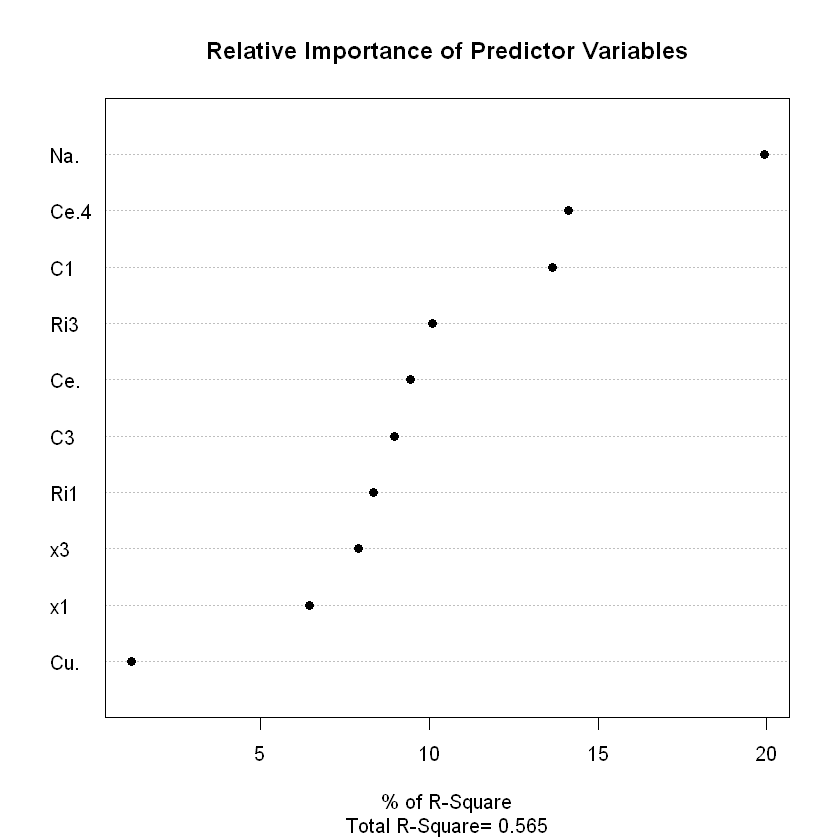

In [18]:
relweights(best_model) %>% arrange(desc(Weights))

In [19]:
rownames(regression_metrics)

[1] "Ce.4"        "(Intercept)" "Ri3"         "Na."         "x3"         
 [6] "Ce."         "C1"          "x1"          "C3"          "Cu."        
[11] "Ri1"

In [20]:
colnames(zeolite_metals)

[1] "C1"       "C2"       "C3"       "x1"       "x2"       "x3"      
 [7] "Ri1"      "Ri2"      "Ri3"      "Capacity" "Na."      "Ni.2"    
[13] "Ce."      "Ce.4"     "Cs.2"     "Cs.3"     "Cs.4"     "Cs.5"    
[19] "Cs.6"     "Cu."      "Ni2."

In [21]:
(dropped_vars <- colnames(zeolite_metals)[colnames(zeolite_metals) %nin%  rownames(regression_metrics) ])

[1] "C2"       "x2"       "Ri2"      "Capacity" "Ni.2"     "Cs.2"    
 [7] "Cs.3"     "Cs.4"     "Cs.5"     "Cs.6"     "Ni2."

In [22]:
#Best fit model
summary(best_model)


Call:
lm(formula = Capacity ~ C1 + C3 + x1 + x3 + Ri1 + Ri3 + Na. + 
    Ce. + Ce.4 + Cu., data = metal_select)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.2607  -5.7227  -0.2267   5.0733  28.5393 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.0267     1.0905  10.111  < 2e-16 ***
C1            12.3352     2.1291   5.794 1.55e-08 ***
C3          -167.2819    36.8416  -4.541 7.76e-06 ***
x1            -0.5834     0.1246  -4.681 4.10e-06 ***
x3            -1.6622     0.2337  -7.112 6.64e-12 ***
Ri1           10.8308     2.9902   3.622 0.000336 ***
Ri3          103.6279    14.4583   7.167 4.67e-12 ***
Na.           14.2450     1.9933   7.146 5.34e-12 ***
Ce.          -14.7335     2.1073  -6.992 1.41e-11 ***
Ce.4         -24.9479     2.1125 -11.810  < 2e-16 ***
Cu.           -6.5779     1.6929  -3.886 0.000122 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.447 on 345 degrees of fre

In [23]:
#Original including full metal variable data
summary(fit_metal)


Call:
lm(formula = Capacity ~ ., data = metal_select)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.949  -5.218  -0.399   5.076  28.851 

Coefficients: (2 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.0267     1.0939  10.080  < 2e-16 ***
C1            16.1968     2.9860   5.424 1.11e-07 ***
C2            -4.6638     2.7749  -1.681 0.093751 .  
C3          -140.4088    41.7776  -3.361 0.000866 ***
x1            -0.5540     0.1270  -4.361 1.72e-05 ***
x2             0.2261     0.1998   1.132 0.258616    
x3            -1.7471     0.2493  -7.009 1.32e-11 ***
Ri1            9.5582     3.1433   3.041 0.002545 ** 
Ri2            0.6204     4.1091   0.151 0.880080    
Ri3           98.5997    15.2998   6.444 4.01e-10 ***
Na.           10.9493     3.0035   3.646 0.000309 ***
Ni.2               NA         NA      NA       NA    
Ce.           -9.1750     3.6309  -2.527 0.011965 *  
Ce.4         -21.1549     3.2025  -6.60

In [24]:
#Check for violoations of assumptions in the best model
summary(gvlma(best_model))


Call:
lm(formula = Capacity ~ C1 + C3 + x1 + x3 + Ri1 + Ri3 + Na. + 
    Ce. + Ce.4 + Cu., data = metal_select)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.2607  -5.7227  -0.2267   5.0733  28.5393 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.0267     1.0905  10.111  < 2e-16 ***
C1            12.3352     2.1291   5.794 1.55e-08 ***
C3          -167.2819    36.8416  -4.541 7.76e-06 ***
x1            -0.5834     0.1246  -4.681 4.10e-06 ***
x3            -1.6622     0.2337  -7.112 6.64e-12 ***
Ri1           10.8308     2.9902   3.622 0.000336 ***
Ri3          103.6279    14.4583   7.167 4.67e-12 ***
Na.           14.2450     1.9933   7.146 5.34e-12 ***
Ce.          -14.7335     2.1073  -6.992 1.41e-11 ***
Ce.4         -24.9479     2.1125 -11.810  < 2e-16 ***
Cu.           -6.5779     1.6929  -3.886 0.000122 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.447 on 345 degrees of fre

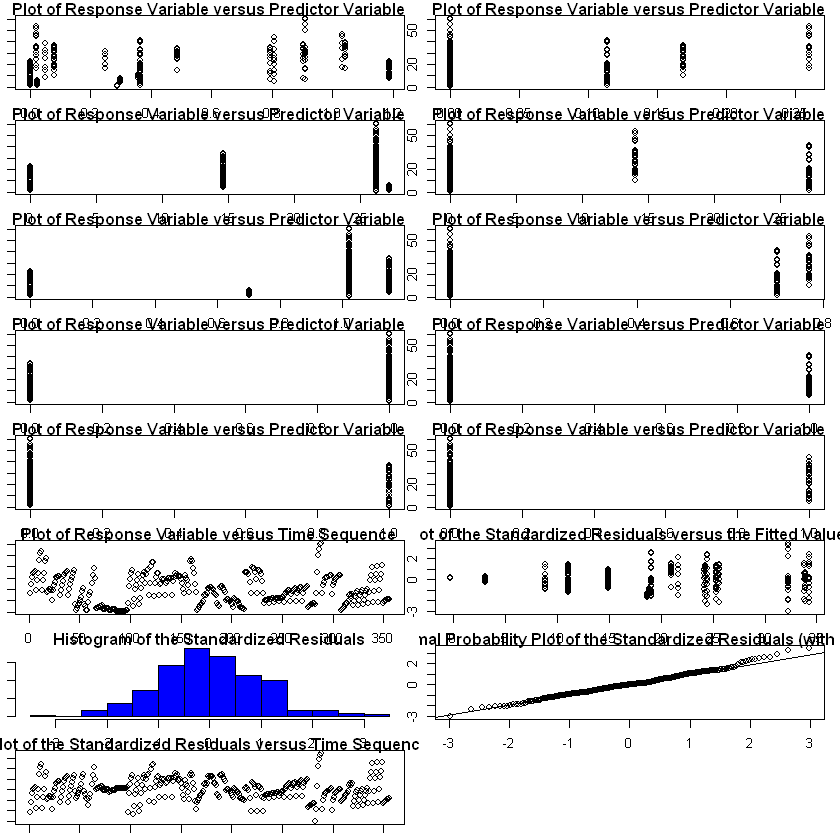

In [25]:
par(mar=c(1,1,1,1))
plot(gvlma(best_model))

In [26]:
#How much variabity do the other factors account for
metal_props  <- c(metal_ion, metal_prop, c('Ce4..1'))
`%nin%` <- Negate(`%in%`)
zeolite_minus_metal_prop <- zeolite_df[colnames(zeolite_df)  %nin% metal_props]

In [27]:
colnames(zeolite_minus_metal_prop)

[1] "SA"                  "Vmicro"              "Vmeso"              
 [4] "pore_size"           "Si_Al"               "dipole_moment"      
 [7] "chemical_hardness"   "kinetic_diameter"    "C_0"                
[10] "oil_adsorbent_ratio" "Temp"                "Capacity"           
[13] "AgX"                 "AgY"                 "CeY"                
[16] "CsY"                 "CuAgY"               "CuCeY"              
[19] "CuHY"                "CuX"                 "CuY"                
[22] "MCM.22"              "NaY"                 "NiCeY"              
[25] "NiY"                 "clinoptilolite"      "Ni.2.1"             
[28] "DBT"                 "TP"                  "cyclohexane"        
[31] "ether"               "hexadecane"          "iso.octane"         
[34] "n.Heptane"           "n.Octane"            "n.heptane"          
[37] "n.octane"

In [28]:
head(zeolite_minus_metal_prop)

SA,Vmicro,Vmeso,pore_size,Si_Al,dipole_moment,chemical_hardness,kinetic_diameter,C_0,oil_adsorbent_ratio,...,DBT,TP,cyclohexane,ether,hexadecane,iso.octane,n.Heptane,n.Octane,n.heptane,n.octane
591,0.295,0.08084211,1.346131,2.43,0.57,3.0401,0.77,291,125,...,0,1,1,0,0,0,0,0,0,0
591,0.295,0.08084211,1.346131,2.43,0.57,3.0401,0.77,420,125,...,0,1,1,0,0,0,0,0,0,0
591,0.295,0.08084211,1.346131,2.43,0.57,3.0401,0.77,556,125,...,0,1,1,0,0,0,0,0,0,0
591,0.295,0.08084211,1.346131,2.43,0.57,3.0401,0.77,719,125,...,0,1,1,0,0,0,0,0,0,0
591,0.295,0.08084211,1.346131,2.43,0.57,3.0401,0.77,833,125,...,0,1,1,0,0,0,0,0,0,0
591,0.295,0.08084211,1.346131,2.43,0.57,3.0401,0.77,970,125,...,0,1,1,0,0,0,0,0,0,0


In [29]:
Scalerx <- preProcess(zeolite_minus_metal_prop, method = c("center", "scale"))

zeolite_minus_metals <- predict(Scalerx, zeolite_minus_metal_prop)


In [30]:
fit_zeolite_minus_metals <- lm(Capacity ~ . , data = zeolite_minus_metals)

In [31]:
best_model_exclusive <- stepAIC(fit_zeolite_minus_metals, direction = "both")

Start:  AIC=-584.37
Capacity ~ SA + Vmicro + Vmeso + pore_size + Si_Al + dipole_moment + 
    chemical_hardness + kinetic_diameter + C_0 + oil_adsorbent_ratio + 
    Temp + AgX + AgY + CeY + CsY + CuAgY + CuCeY + CuHY + CuX + 
    CuY + MCM.22 + NaY + NiCeY + NiY + clinoptilolite + Ni.2.1 + 
    DBT + TP + cyclohexane + ether + hexadecane + iso.octane + 
    n.Heptane + n.Octane + n.heptane + n.octane


Step:  AIC=-584.37
Capacity ~ SA + Vmicro + Vmeso + pore_size + Si_Al + dipole_moment + 
    chemical_hardness + kinetic_diameter + C_0 + oil_adsorbent_ratio + 
    Temp + AgX + AgY + CeY + CsY + CuAgY + CuCeY + CuHY + CuX + 
    CuY + MCM.22 + NaY + NiCeY + NiY + clinoptilolite + Ni.2.1 + 
    DBT + TP + cyclohexane + ether + hexadecane + iso.octane + 
    n.Heptane + n.Octane + n.heptane


Step:  AIC=-584.37
Capacity ~ SA + Vmicro + Vmeso + pore_size + Si_Al + dipole_moment + 
    chemical_hardness + kinetic_diameter + C_0 + oil_adsorbent_ratio + 
    Temp + AgX + AgY + CeY + CsY + Cu

In [32]:
(regression_metricsx <-  tidy(best_model_exclusive) %>% column_to_rownames("term")  %>% arrange(p.value))

,estimate,std.error,statistic,p.value
C_0,5.974225e-01,0.03073061,1.944063e+01,1.078938e-56
iso.octane,3.835713e+00,1.36971313,2.800377e+00,5.404140e-03
CuHY,4.869555e-01,0.17538469,2.776499e+00,5.807553e-03
oil_adsorbent_ratio,1.507641e+01,5.74243722,2.625438e+00,9.055460e-03
NiY,-9.367342e+00,3.75244184,-2.496332e+00,1.303439e-02
CsY,-8.833243e+00,3.54816903,-2.489522e+00,1.328202e-02
NaY,-5.008896e+01,20.22238622,-2.476906e+00,1.375172e-02
Vmicro,4.205748e+01,16.98460572,2.476212e+00,1.377801e-02
AgY,1.972345e+00,0.80402902,2.453077e+00,1.467934e-02
SA,-9.640250e+00,3.94918444,-2.441074e+00,1.516724e-02


In [33]:
(dropped_varxs <- colnames(best_model_exclusive)[colnames(best_model_exclusive) %nin%  rownames(regression_metricsx) ])

NULL

,Weights
C_0,32.3466536
oil_adsorbent_ratio,8.7850492
CeY,6.6277874
Vmicro,6.0637584
NaY,4.7566777
ether,4.5695039
AgY,4.1588416
Si_Al,4.0743264
Vmeso,3.1887161
iso.octane,3.1480399


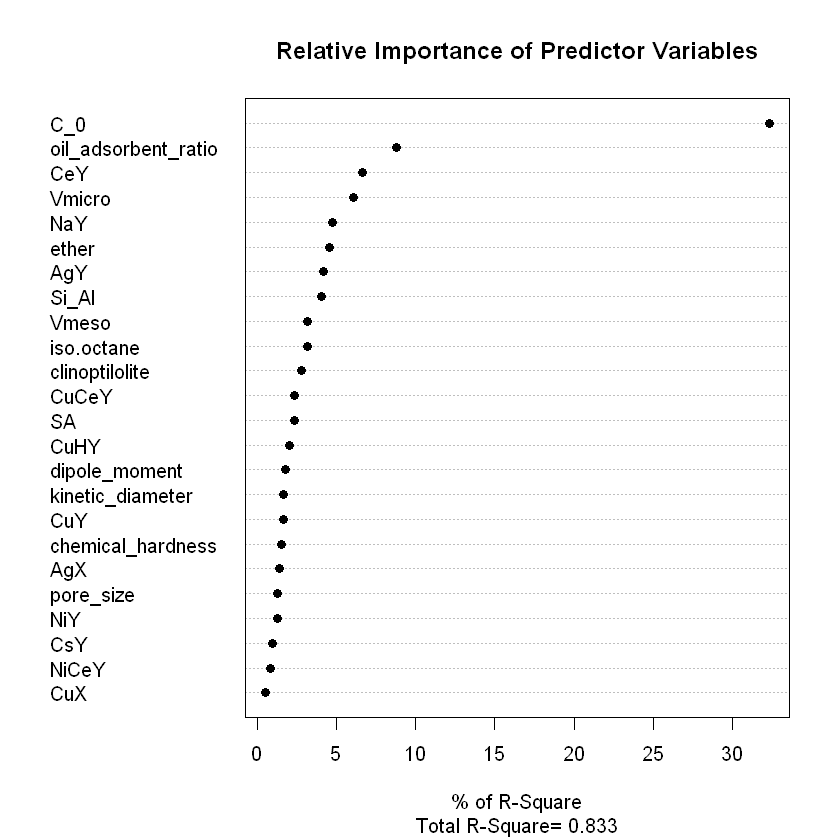

In [34]:
relweights(best_model_exclusive) %>% arrange(desc(Weights))

In [35]:
summary(best_model_exclusive)


Call:
lm(formula = Capacity ~ SA + Vmicro + Vmeso + pore_size + Si_Al + 
    dipole_moment + chemical_hardness + kinetic_diameter + C_0 + 
    oil_adsorbent_ratio + AgX + AgY + CeY + CsY + CuCeY + CuHY + 
    CuX + CuY + NaY + NiCeY + NiY + clinoptilolite + ether + 
    iso.octane, data = zeolite_minus_metals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.53228 -0.17734  0.03512  0.19113  2.07150 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -4.726e-14  2.244e-02   0.000  1.00000    
SA                  -9.640e+00  3.949e+00  -2.441  0.01517 *  
Vmicro               4.206e+01  1.698e+01   2.476  0.01378 *  
Vmeso                2.393e+01  9.944e+00   2.406  0.01667 *  
pore_size            9.345e+00  4.182e+00   2.235  0.02612 *  
Si_Al                9.235e-01  3.788e-01   2.438  0.01531 *  
dipole_moment       -8.335e+01  3.489e+01  -2.389  0.01745 *  
chemical_hardness    4.618e+01  1.905e+01   2.425  0.01586 *  
k